<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/data_ananlysis_with_pandas/Feature_Selection_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00498/incident_event_log.zip"

df = pd.read_csv(url, compression='zip', header=0, sep=',', quotechar='"')

In [2]:
print(df.head())

print(df.shape)

       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor cause

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_updated_by           141712 non-null  object
 12  contact_type             141712 non-null  object
 13  location                 141712 non-null  object
 14  category            

In [3]:
df = df.drop(['sys_updated_at', 'sys_created_at'], axis=1)

<ipython-input-4-91af870b7b07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

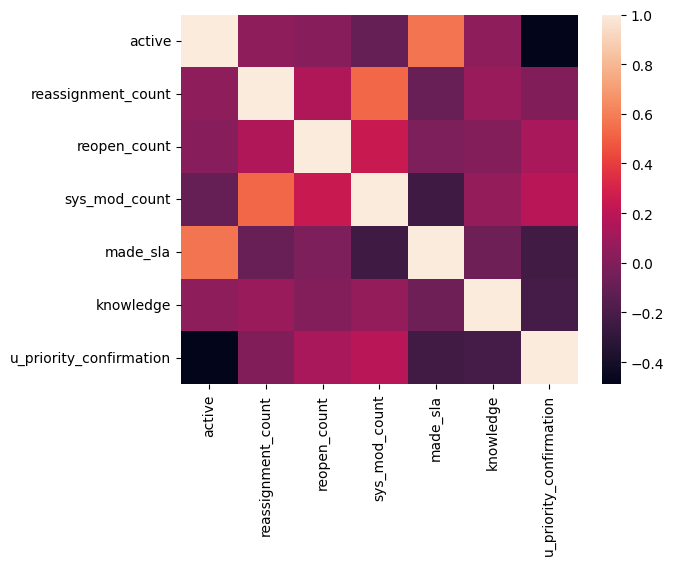

In [4]:
import seaborn as sns

sns.heatmap(df.corr())

In [6]:
df = df.drop(['impact', 'urgency'], axis=1)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.select_dtypes(include=[int, float])

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns

print(vif)

   VIF Factor            features
0    1.805290  reassignment_count
1    1.074857        reopen_count
2    1.868919       sys_mod_count


In [8]:
df = df.drop(['sys_mod_count'], axis=1)

In [9]:
df.to_csv('cleaned_data.csv', index=False)